In [1]:
import pandas as pd
from statsbombpy import sb
import numpy as np
from mplsoccer import Pitch,VerticalPitch, Sbopen, FontManager, inset_image


### Competitions  
From this table we will be able to see the id of the competition

In [2]:
sb.competitions().head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [3]:
sb.matches(competition_id=43, season_id=106).head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2


#### Match id for Argentia Vs France 2022 world cup final

In [4]:
MATCH_ID = 3869685

### Importing datasets through statsbomb api

In [5]:
## This dataset consists of data related to all the events of a matches
match_event_df = sb.events(match_id=MATCH_ID)

In [6]:
## this dataset consists of a data of the camera, which has data, visibale area and the objects in the freeze_frame
match_360_df = pd.read_json(f'/Users/asheshlalshrestha/Desktop/Datanal/Project/Football Data/open-data-master/data/three-sixty/{MATCH_ID}.json')

In [7]:
match_360_df

,event_uuid,visible_area,freeze_frame
0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,97b5dc82-547a-4f93-a632-a2a8daf5ac98,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
2,9707e590-1d55-4d25-a50f-475019356152,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
3,a5956ecc-d637-44d2-8705-e2079e12013e,"[10.227276315524, 80.0, 41.5155332886657, 0.0,...","[{'teammate': True, 'actor': False, 'keeper': ..."
4,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,"[13.2232254880239, 80.0, 0.0, 65.4802459369524...","[{'teammate': True, 'actor': False, 'keeper': ..."
...,...,...,...
3678,97439112-dfb5-4bd5-9967-554095296096,"[74.8245066203564, 80.0, 65.5827051836776, 11....","[{'teammate': True, 'actor': True, 'keeper': F..."
3679,50dcde1a-faa3-4eec-a0cd-3f09a7cf763a,"[71.7859219296227, 80.0, 72.1109742638867, 8.9...","[{'teammate': True, 'actor': True, 'keeper': F..."
3680,54e27ba9-b9ae-44a3-ac8d-fc91e76a1b91,"[6.10280272391214, 80.0, 37.1010455294984, 7.9...","[{'teammate': True, 'actor': True, 'keeper': F..."
3681,bcc6d4ae-f71c-4566-bf2d-c12f910eb526,"[6.0830318986702, 80.0, 35.2414826693926, 9.61...","[{'teammate': True, 'actor': True, 'keeper': F..."


In [8]:
match_event_df.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN


### Merging two datasets on the basis of the event_uuid

In [9]:
df = pd.merge(left=match_event_df,right = match_360_df,
              left_on='id',right_on='event_uuid',how='left')

In [10]:
df.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:00:00.000,Half Start,NaN,NaN,NaN,NaN


In [11]:
df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

### Messi pass analysis

In [12]:
## Messi player id is 5503
MESSI = 5503

## filtering the dataset with MESSI as player and type as Pass
df1 = df[(df['player_id']==MESSI) & (df['type']=='Pass')].reset_index(drop=True)
df1.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:02:16.985,Pass,True,1552304a-f3c0-42bf-b7ff-d7b0173d7488,"[85.5040380313735, 77.9451748902892, 58.862742...","[{'teammate': False, 'actor': False, 'keeper':..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:02:27.185,Pass,NaN,f9405131-3f16-47bc-ab94-082f20057f60,"[98.8387085779202, 79.2108986084354, 74.322964...","[{'teammate': True, 'actor': False, 'keeper': ..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:03:52.966,Pass,NaN,dcc37e05-d4f7-46ee-8697-9d0376ccccc0,"[53.4407029120278, 78.4795871059066, 38.950153...","[{'teammate': True, 'actor': False, 'keeper': ..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:04:26.443,Pass,NaN,4af1c94c-9d4f-4f52-a365-1a1f6cf609cd,"[90.6577131581134, 80.0, 61.1733802546724, 80....","[{'teammate': True, 'actor': False, 'keeper': ..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:07:11.325,Pass,NaN,4e969f98-9588-487e-ba88-3d797c6e2fa7,"[73.4864363052754, 0.0, 63.9023629764572, 80.0...","[{'teammate': True, 'actor': False, 'keeper': ..."


In [13]:
df1.location.head()

0    [76.6, 35.7]
1    [99.3, 57.3]
2    [67.9, 59.0]
3    [81.8, 65.2]
4    [39.2, 48.1]
Name: location, dtype: object

In [14]:
## start location of the passes
df1[['x_start','y_start']] = pd.DataFrame(df1.location.tolist(),index=df1.index)
df1.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:02:16.985,Pass,True,1552304a-f3c0-42bf-b7ff-d7b0173d7488,"[85.5040380313735, 77.9451748902892, 58.862742...","[{'teammate': False, 'actor': False, 'keeper':...",76.6,35.7
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:02:27.185,Pass,NaN,f9405131-3f16-47bc-ab94-082f20057f60,"[98.8387085779202, 79.2108986084354, 74.322964...","[{'teammate': True, 'actor': False, 'keeper': ...",99.3,57.3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:03:52.966,Pass,NaN,dcc37e05-d4f7-46ee-8697-9d0376ccccc0,"[53.4407029120278, 78.4795871059066, 38.950153...","[{'teammate': True, 'actor': False, 'keeper': ...",67.9,59.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:04:26.443,Pass,NaN,4af1c94c-9d4f-4f52-a365-1a1f6cf609cd,"[90.6577131581134, 80.0, 61.1733802546724, 80....","[{'teammate': True, 'actor': False, 'keeper': ...",81.8,65.2
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:07:11.325,Pass,NaN,4e969f98-9588-487e-ba88-3d797c6e2fa7,"[73.4864363052754, 0.0, 63.9023629764572, 80.0...","[{'teammate': True, 'actor': False, 'keeper': ...",39.2,48.1


In [15]:
df1['pass_end_location'].head()

0    [116.2, 8.9]
1    [96.7, 49.8]
2    [49.0, 60.3]
3    [70.2, 67.7]
4    [65.3, 35.4]
Name: pass_end_location, dtype: object

In [16]:
df1[['x_end','y_end']] = pd.DataFrame(df1.pass_end_location.tolist(),index=df1.index)

In [17]:
df1.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start,x_end,y_end
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:02:16.985,Pass,True,1552304a-f3c0-42bf-b7ff-d7b0173d7488,"[85.5040380313735, 77.9451748902892, 58.862742...","[{'teammate': False, 'actor': False, 'keeper':...",76.6,35.7,116.2,8.9
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:02:27.185,Pass,NaN,f9405131-3f16-47bc-ab94-082f20057f60,"[98.8387085779202, 79.2108986084354, 74.322964...","[{'teammate': True, 'actor': False, 'keeper': ...",99.3,57.3,96.7,49.8
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:03:52.966,Pass,NaN,dcc37e05-d4f7-46ee-8697-9d0376ccccc0,"[53.4407029120278, 78.4795871059066, 38.950153...","[{'teammate': True, 'actor': False, 'keeper': ...",67.9,59.0,49.0,60.3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:04:26.443,Pass,NaN,4af1c94c-9d4f-4f52-a365-1a1f6cf609cd,"[90.6577131581134, 80.0, 61.1733802546724, 80....","[{'teammate': True, 'actor': False, 'keeper': ...",81.8,65.2,70.2,67.7
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:07:11.325,Pass,NaN,4e969f98-9588-487e-ba88-3d797c6e2fa7,"[73.4864363052754, 0.0, 63.9023629764572, 80.0...","[{'teammate': True, 'actor': False, 'keeper': ...",39.2,48.1,65.3,35.4


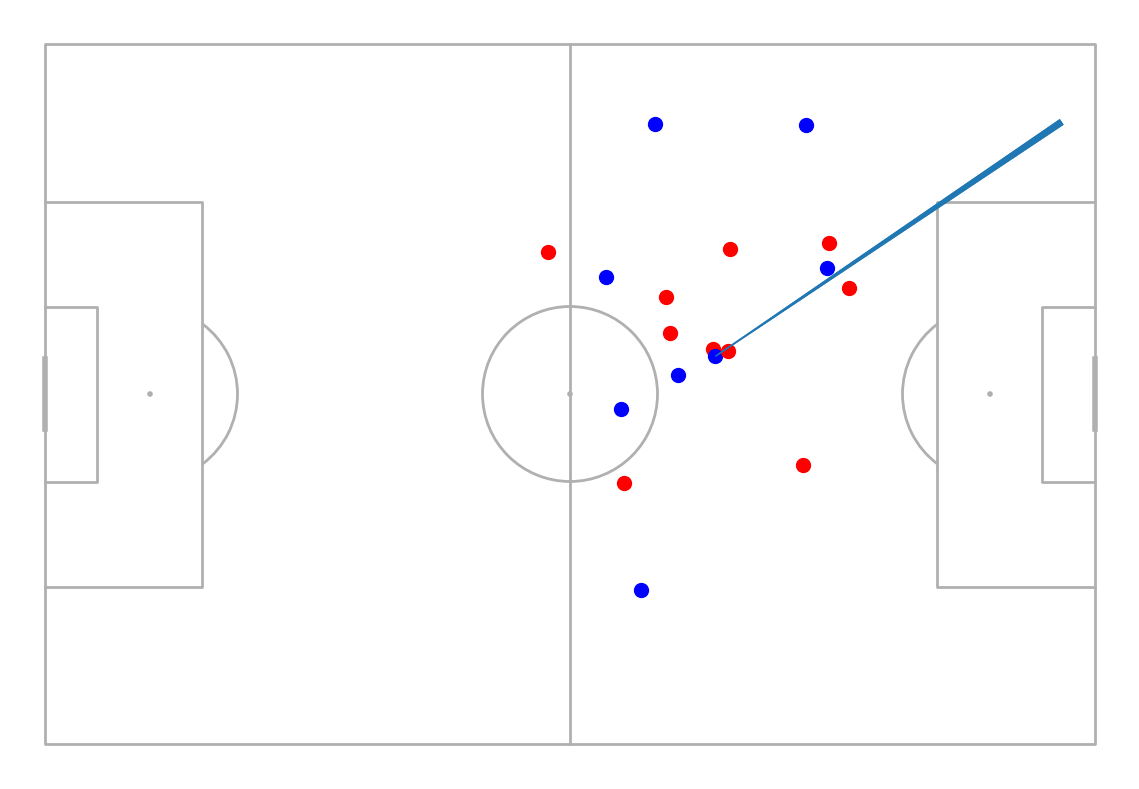

In [18]:
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12, 8))

## the single pass
df1 = df1.iloc[0:1]  # Corrected indexing syntax

p.scatter(x=df1['x_start'], y=df1['y_start'], ax=ax)
p.lines(xstart=df1['x_start'], xend=df1['x_end'], ystart=df1['y_start'], yend=df1['y_end'], ax=ax, comet=True)  # Corrected typo (xend==df['x_end'])

for x in df1.iloc[0]['freeze_frame']:
    if x['teammate']:
        color = 'blue'
    else:
        color = 'red'
        
    p.scatter(x=x['location'][0],y=x['location'][1],ax=ax,c=color,s=100)

### Finding Mbappes player_id

In [19]:
## all players who played the match
unique_players = df[['player', 'player_id']].drop_duplicates()
unique_players

,player,player_id
0,NaN,NaN
12,Antoine Griezmann,5487.0
13,Aurélien Djani Tchouaméni,10481.0
14,Nahuel Molina Lucero,29201.0
15,Rodrigo Javier De Paul,7797.0
16,Cristian Gabriel Romero,20572.0
17,Nicolás Hernán Otamendi,3090.0
20,Nicolás Alejandro Tagliafico,5507.0
27,Damián Emiliano Martínez,6909.0
28,Theo Bernard François Hernández,6704.0


In [20]:
MBAPPE = 3009.0

df1 = df[(df['player_id']==MBAPPE) & (df['shot_outcome']=='Goal')].reset_index(drop=True)
df1

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:34:24.975,Shot,NaN,6cc0d5e2-6999-4006-8a7a-34de4cbe3ffd,"[111.040679999615, 61.2180691486706, 94.960792...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:35:59.025,Shot,NaN,03fb2918-e1e7-4ec8-89ff-7bc5531e853d,"[103.353210982717, 74.4449113428643, 80.176313...","[{'teammate': False, 'actor': False, 'keeper':..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:12:05.189,Shot,NaN,d9b92dbd-4fea-4f48-b2fb-d7222eab2dbd,"[110.856817541161, 61.2421309867409, 95.263925...","[{'teammate': False, 'actor': False, 'keeper':..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:00:13.386,Shot,NaN,NaN,NaN,NaN


### Analyzing the second goal socred (excluding all penalties )

In [21]:
df1.location.tolist()

[[108.0, 40.0], [104.8, 30.1], [108.0, 40.0], [108.1, 40.1]]

In [22]:
df1.shot_end_location.str[:2]

0    [120.0, 37.3]
1    [120.0, 41.5]
2    [120.0, 36.7]
3    [120.0, 37.6]
Name: shot_end_location, dtype: object

In [23]:
df1[['x_start','y_start']] = pd.DataFrame(df1.location.tolist(),index=df1.index)
df1[['x_end','y_end']] = pd.DataFrame(df1.shot_end_location.str[:2].tolist(),index=df1.index)
df1

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start,x_end,y_end
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:34:24.975,Shot,NaN,6cc0d5e2-6999-4006-8a7a-34de4cbe3ffd,"[111.040679999615, 61.2180691486706, 94.960792...","[{'teammate': True, 'actor': False, 'keeper': ...",108.0,40.0,120.0,37.3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:35:59.025,Shot,NaN,03fb2918-e1e7-4ec8-89ff-7bc5531e853d,"[103.353210982717, 74.4449113428643, 80.176313...","[{'teammate': False, 'actor': False, 'keeper':...",104.8,30.1,120.0,41.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:12:05.189,Shot,NaN,d9b92dbd-4fea-4f48-b2fb-d7222eab2dbd,"[110.856817541161, 61.2421309867409, 95.263925...","[{'teammate': False, 'actor': False, 'keeper':...",108.0,40.0,120.0,36.7
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:00:13.386,Shot,NaN,NaN,NaN,NaN,108.1,40.1,120.0,37.6


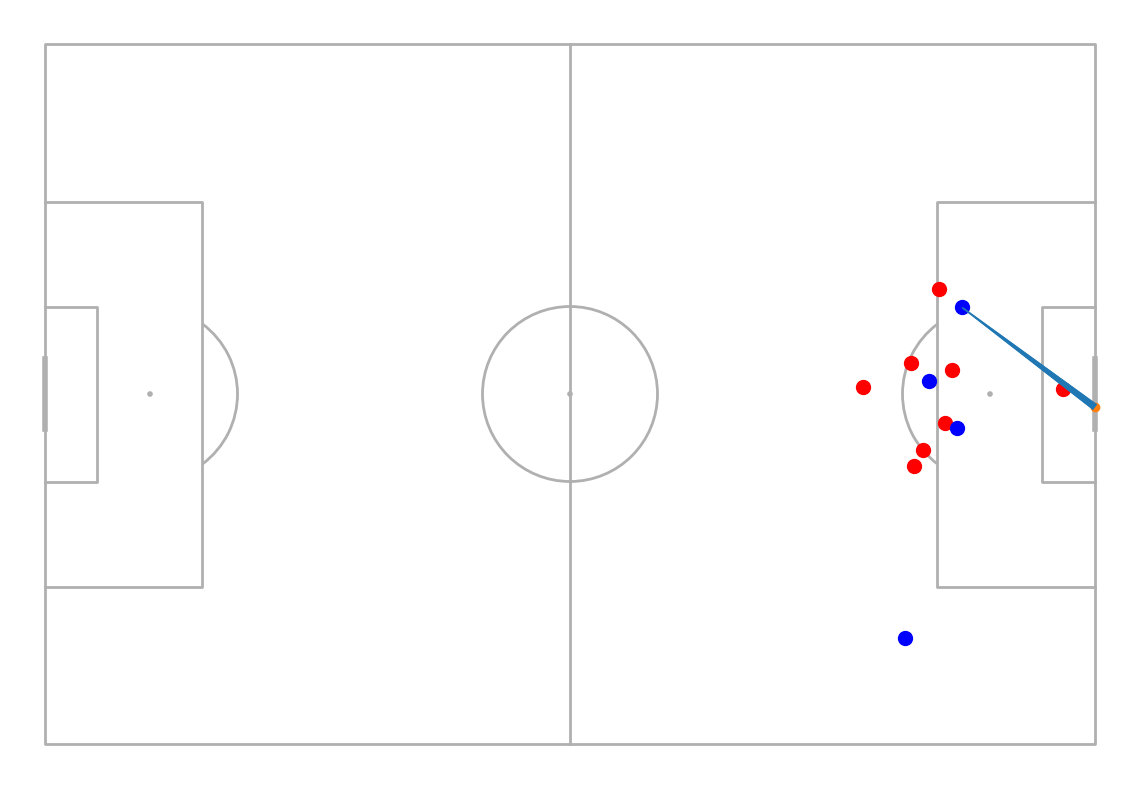

In [24]:
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12, 8))

## the single pass
df1_goal = df1.iloc[1]  
p.scatter(x=df1_goal['x_start'], y=df1_goal['y_start'], ax=ax)
p.scatter(x=df1_goal['x_end'], y=df1_goal['y_end'], ax=ax)

p.lines(xstart=df1_goal['x_start'], xend=df1_goal['x_end'], ystart=df1_goal['y_start'], yend=df1_goal['y_end'], ax=ax, comet=True)  # Corrected typo (xend==df['x_end'])


for x in df1_goal['freeze_frame']:
    if x['teammate']:
        color = 'blue'
    else:
        color = 'red'
        
    p.scatter(x=x['location'][0],y=x['location'][1],ax=ax,c=color,s=100)

### Team formations

In [25]:
## extracting formations from the main df
team_formation = df.tactics.iloc[:2]
team_argentina = team_formation[0]
team_france = team_formation[1]

### Argenting lineup

In [26]:
## the dictionary consists of two keys which are lineup and formation we require only lineup for now
df_argentina_lineup = pd.DataFrame(team_argentina['lineup'])
## extracting only the player name and he position
df_argentina_lineup['name']=df_argentina_lineup['player'].apply(lambda x: x['name'])
df_argentina_lineup['pos']=df_argentina_lineup['position'].apply(lambda x: x['name'])
df_argentina_lineup = df_argentina_lineup.drop(['player','position'], axis=1)
## extracting the formation
formation = str(team_argentina['formation'])
formation = "-".join(list(formation))
print(formation)
df_argentina_lineup


4-3-3


,jersey_number,name,pos
0,23,Damián Emiliano Martínez,Goalkeeper
1,26,Nahuel Molina Lucero,Right Back
2,13,Cristian Gabriel Romero,Right Center Back
3,19,Nicolás Hernán Otamendi,Left Center Back
4,3,Nicolás Alejandro Tagliafico,Left Back
5,24,Enzo Fernandez,Center Defensive Midfield
6,7,Rodrigo Javier De Paul,Right Center Midfield
7,20,Alexis Mac Allister,Left Center Midfield
8,10,Lionel Andrés Messi Cuccittini,Right Wing
9,11,Ángel Fabián Di María Hernández,Left Wing


### France lineup

In [27]:
## the dictionary consists of two keys which are lineup and formation we require only lineup for now
df_france_lineup = pd.DataFrame(team_france['lineup'])
## extracting only the player name and he position
df_france_lineup['name']=df_france_lineup['player'].apply(lambda x: x['name'])
df_france_lineup['pos']=df_france_lineup['position'].apply(lambda x: x['name'])
df_france_lineup = df_france_lineup.drop(['player','position'], axis=1)
## extracting the formation
formation = str(team_france['formation'])
formation = "-".join(list(formation))
print(formation)
df_france_lineup

4-2-3-1


,jersey_number,name,pos
0,1,Hugo Lloris,Goalkeeper
1,5,Jules Koundé,Right Back
2,4,Raphaël Varane,Right Center Back
3,18,Dayotchanculle Upamecano,Left Center Back
4,22,Theo Bernard François Hernández,Left Back
5,8,Aurélien Djani Tchouaméni,Right Defensive Midfield
6,14,Adrien Rabiot,Left Defensive Midfield
7,11,Ousmane Dembélé,Right Wing
8,7,Antoine Griezmann,Center Attacking Midfield
9,10,Kylian Mbappé Lottin,Left Wing


### Reading Kilyan Mbappe's ball carry

A player controls the ball at their feet while moving or standing still.

In [28]:
## Filtering the main dataset that shows mbappe and type as carry
df_mbappe_carry = df[(df['player_id']==MBAPPE) & (df['type']=='Carry')].reset_index(drop=True)
# df_mbappe_carry.to_csv("mbappecarry.csv")

In [29]:
## plotting the start and end carry location on the pitch

df_mbappe_carry[['x_start','y_start']] = pd.DataFrame(df_mbappe_carry.location.tolist()
                                                      ,index=df_mbappe_carry.index)
df_mbappe_carry[['x_end','y_end']] = pd.DataFrame(df_mbappe_carry.carry_end_location.tolist()
                                                      ,index=df_mbappe_carry.index)

In [30]:
df_mbappe_carry.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start,x_end,y_end
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[38.8, 46.8]",NaN,NaN,...,00:04:19.139,Carry,True,5ba25b60-3df6-4eb0-bf65-25010601764f,"[0.0, 80.0, 0.0, 64.469961663608, 29.115845066...","[{'teammate': True, 'actor': False, 'keeper': ...",37.5,45.1,38.8,46.8
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[68.7, 5.9]",NaN,NaN,...,00:05:01.571,Carry,NaN,e9d0b2c5-33af-4069-8a9b-f758d8e96fd0,"[37.2709426413391, 80.0, 50.7385063201748, 4.5...","[{'teammate': True, 'actor': False, 'keeper': ...",69.3,5.3,68.7,5.9
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[99.1, 19.2]",NaN,NaN,...,00:13:02.628,Carry,NaN,e9afd476-7735-4e7b-9e1c-ea2e578fc97e,"[98.6419498090069, 80.0, 78.0171887486366, 15....","[{'teammate': True, 'actor': False, 'keeper': ...",100.6,14.3,99.1,19.2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[81.8, 5.1]",NaN,NaN,...,00:17:22.381,Carry,True,9e051769-414b-416a-b588-eab06b4e1868,"[58.4352620340888, 80.0, 58.4206224732911, 5.6...","[{'teammate': False, 'actor': False, 'keeper':...",83.7,4.9,81.8,5.1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[105.9, 5.5]",NaN,NaN,...,00:24:06.891,Carry,NaN,38177784-49b8-4b05-8662-af395e258d7c,"[87.5395303869434, 80.0, 70.113005670178, 7.29...","[{'teammate': True, 'actor': False, 'keeper': ...",96.5,5.1,105.9,5.5


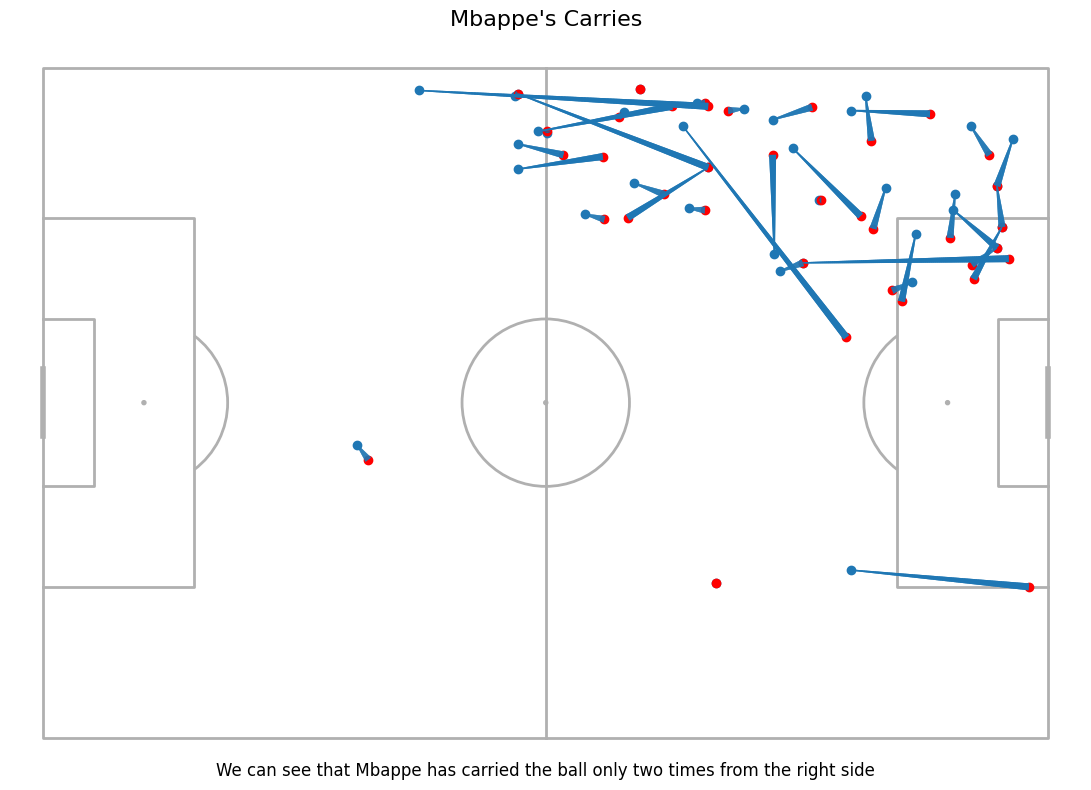

In [31]:
import matplotlib.pyplot as plt

# Your existing code to create the pitch visualization
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12, 8))

## plotting the start and end locations
p.scatter(x=df_mbappe_carry['x_start'], y=df_mbappe_carry['y_start'], ax=ax)
p.scatter(x=df_mbappe_carry['x_end'], y=df_mbappe_carry['y_end'], ax=ax, color='red')

## plotting the lines of the start and end locations
p.lines(xstart=df_mbappe_carry['x_start'], xend=df_mbappe_carry['x_end'], ystart=df_mbappe_carry['y_start'], yend=df_mbappe_carry['y_end'], ax=ax, comet=True)

## setting the title
ax.set_title("Mbappe's Carries", fontsize=16)

## adding description
description = "We can see that Mbappe has carried the ball only two times from the right side"
ax.text(0.5,0, description, ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.show()


### Similarly reading Mbappe's ball dribbling
An attempt by a player to beat an opponent

In [32]:
## Filtering the main dataset that shows mbappe and type as carry
df_mbappe_dribble = df[(df['player_id']==MBAPPE) & (df['type']=='Dribble')].reset_index(drop=True)
# df_mbappe_dribble.to_csv("dribble.csv")

In [33]:
## plotting the start and end dribble location on the pitch
df_mbappe_dribble[['x_start','y_start']] = pd.DataFrame(df_mbappe_dribble.location.tolist()
                                                      ,index=df_mbappe_dribble.index)

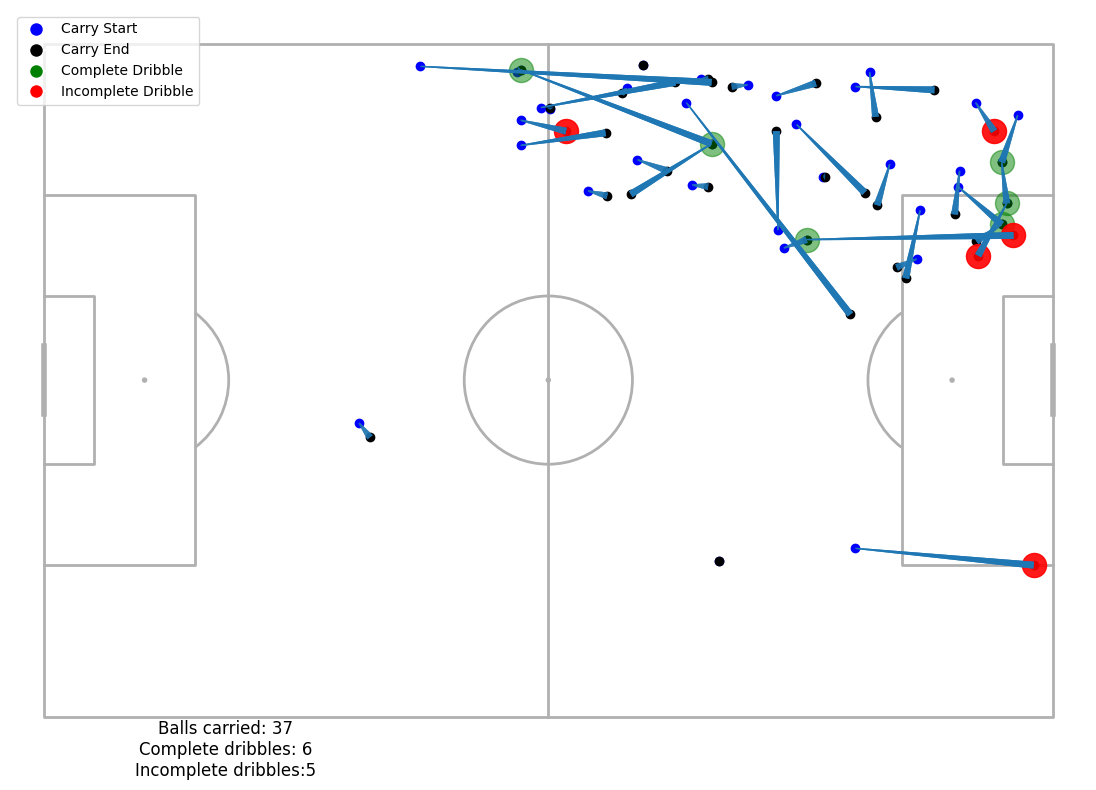

In [34]:
from matplotlib.lines import Line2D

p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12, 8))

# Plotting the start and end locations of the carry
p.scatter(x=df_mbappe_carry['x_start'], y=df_mbappe_carry['y_start'], ax=ax, color='blue', label='Carry Start')
p.scatter(x=df_mbappe_carry['x_end'], y=df_mbappe_carry['y_end'], ax=ax, color='black', label='Carry End')

# Plotting the lines of the start and end locations of the carry
p.lines(xstart=df_mbappe_carry['x_start'], xend=df_mbappe_carry['x_end'], ystart=df_mbappe_carry['y_start'], yend=df_mbappe_carry['y_end'], ax=ax, comet=True)

# Plotting the dribbles
for index, row in df_mbappe_dribble.iterrows():
    if row['dribble_outcome'] == 'Complete':
        p.scatter(x=row['x_start'], y=row['y_start'], ax=ax, color='green', s=300, alpha=0.5)
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], ax=ax, color='red', s=300, alpha=0.9)

# Create custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Carry Start', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Carry End', markerfacecolor='black', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Complete Dribble', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Incomplete Dribble', markerfacecolor='red', markersize=10),
]
ax.legend(handles=legend_elements)

# Adding description
description = f"Balls carried: {len(df_mbappe_carry)}\nComplete dribbles: {len(df_mbappe_dribble[df_mbappe_dribble['dribble_outcome'] == 'Complete'])}\nIncomplete dribbles:{len(df_mbappe_dribble[df_mbappe_dribble['dribble_outcome'] == 'Incomplete'])}"
ax.text(0.2, 0, description, ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.show()


In [35]:
## Filtering the main dataset that shows mbappe and type as carry
df_mbappe_shot = df[(df['player_id']==MBAPPE) & (df['type']=='Shot')].reset_index(drop=True)

In [36]:
## plotting the start and end of the shot location on the pitch
df_mbappe_shot[['x_start','y_start']] = pd.DataFrame(df_mbappe_shot.location.tolist()
                                                      ,index=df_mbappe_shot.index)
df_mbappe_shot[['x_end','y_end']] = pd.DataFrame(df_mbappe_shot.shot_end_location.str[:2].tolist()
                                                      ,index=df_mbappe_shot.index)
df_mbappe_shot['distance'] = np.sqrt((df_mbappe_shot['x_end'] - df_mbappe_shot['x_start'])**2 + (df_mbappe_shot['y_end'] - df_mbappe_shot['y_start'])**2)

df_mbappe_shot.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start,x_end,y_end,distance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Shot,NaN,b2d43671-a3e6-4709-9c0c-646442c1074c,"[101.089048026568, 74.9666154321985, 78.270958...","[{'teammate': True, 'actor': False, 'keeper': ...",102.5,27.9,120.0,38.8,20.616983
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Shot,NaN,6cc0d5e2-6999-4006-8a7a-34de4cbe3ffd,"[111.040679999615, 61.2180691486706, 94.960792...","[{'teammate': True, 'actor': False, 'keeper': ...",108.0,40.0,120.0,37.3,12.300000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Shot,NaN,03fb2918-e1e7-4ec8-89ff-7bc5531e853d,"[103.353210982717, 74.4449113428643, 80.176313...","[{'teammate': False, 'actor': False, 'keeper':...",104.8,30.1,120.0,41.5,19.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Shot,NaN,5dbcde3d-ba75-483d-a65f-72d2b99ff713,"[103.542217459914, 73.1134699098668, 79.125303...","[{'teammate': False, 'actor': False, 'keeper':...",95.9,32.2,100.7,33.5,4.972927
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Shot,NaN,08f2f203-cdc9-4146-99b6-818c5c32bf70,"[103.830317968414, 75.0927017537735, 78.162699...","[{'teammate': True, 'actor': False, 'keeper': ...",101.4,26.6,104.5,29.1,3.982462


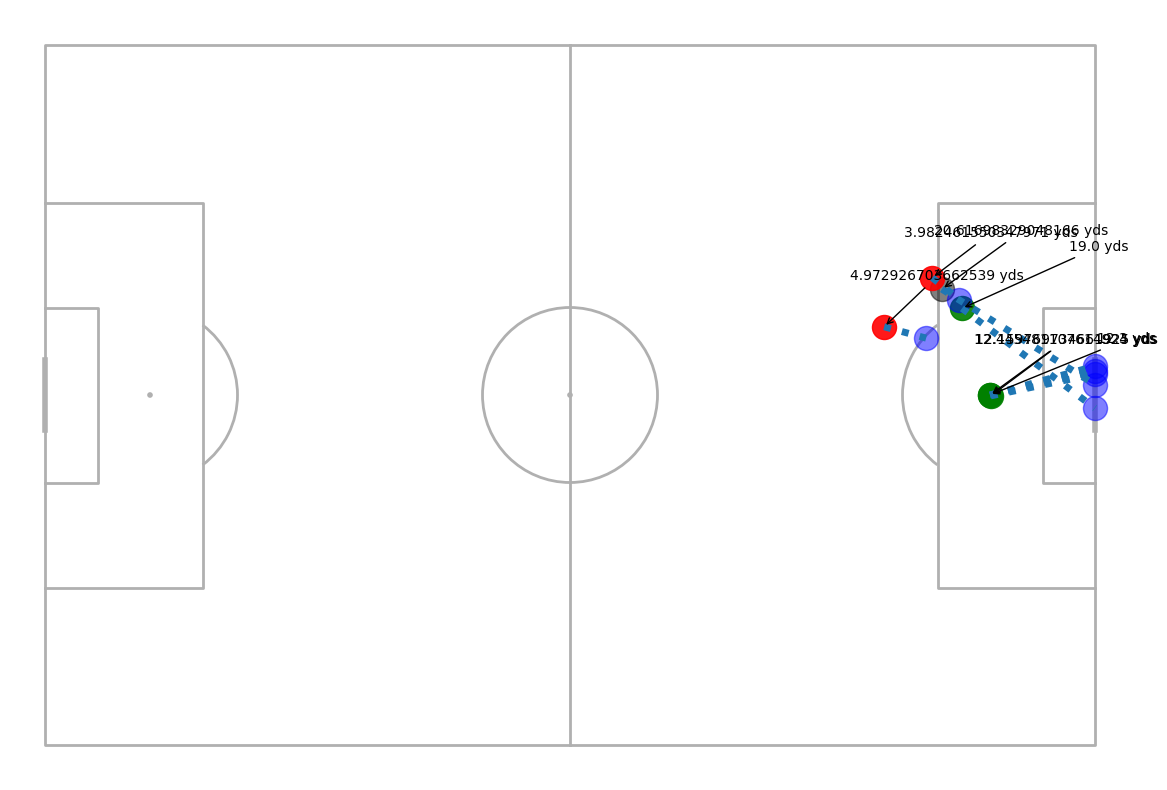

In [37]:
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12, 8))

# Plotting the shots
for index, row in df_mbappe_shot.iterrows():
    if row['shot_outcome'] == 'Off T':
        p.scatter(x=row['x_start'], y=row['y_start'], ax=ax, color='black', s=300, alpha=0.5)
        p.scatter(x=row['x_end'], y=row['y_end'], ax=ax, color='blue', s=300, alpha=0.5)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax, linestyle='dotted')
        ax.annotate(f"{row['distance']} yds", xy=(row['x_start'], row['y_start']), xytext=(row['x_end'], row['y_end']), textcoords='offset points', arrowprops=dict(arrowstyle='->'), xycoords='data', ha='right')
    elif row['shot_outcome'] == 'Goal':
        p.scatter(x=row['x_start'], y=row['y_start'], ax=ax, color='green', s=300, alpha=0.9)
        p.scatter(x=row['x_end'], y=row['y_end'], ax=ax, color='blue', s=300, alpha=0.5)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax, linestyle='dotted')
        ax.annotate(f"{row['distance']} yds", xy=(row['x_start'], row['y_start']), xytext=(row['x_end'], row['y_end']), textcoords='offset points', arrowprops=dict(arrowstyle='->'), xycoords='data', ha='right')
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], ax=ax, color='red', s=300, alpha=0.9)
        p.scatter(x=row['x_end'], y=row['y_end'], ax=ax, color='blue', s=300, alpha=0.5)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax, linestyle='dotted')
        ax.annotate(f"{row['distance']} yds", xy=(row['x_start'], row['y_start']), xytext=(row['x_end'], row['y_end']), textcoords='offset points', arrowprops=dict(arrowstyle='->'), xycoords='data', ha='right')
plt.show()

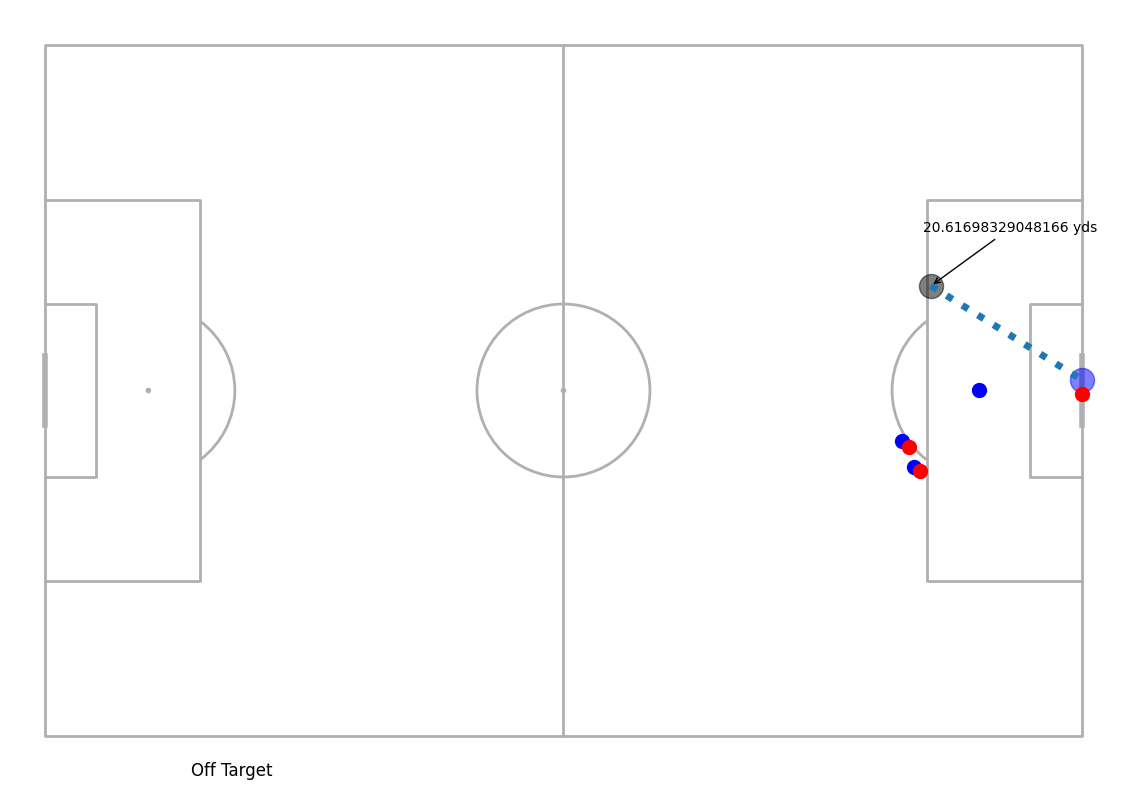

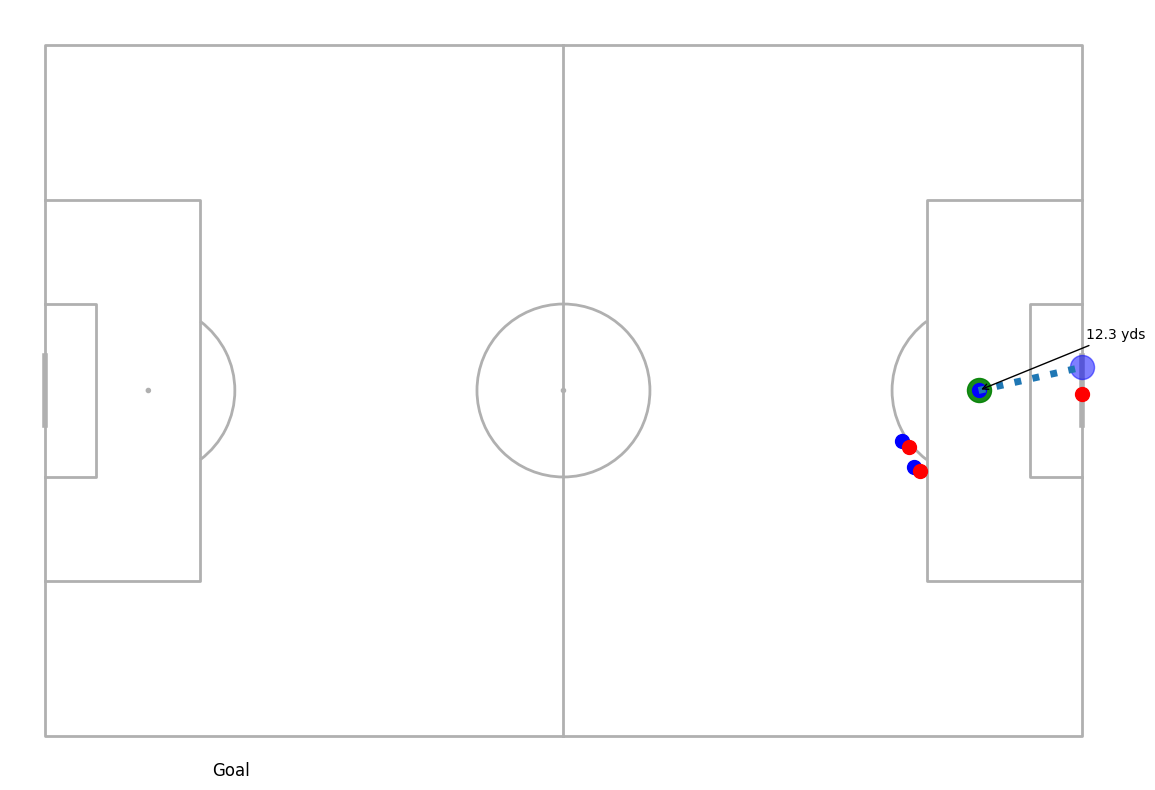

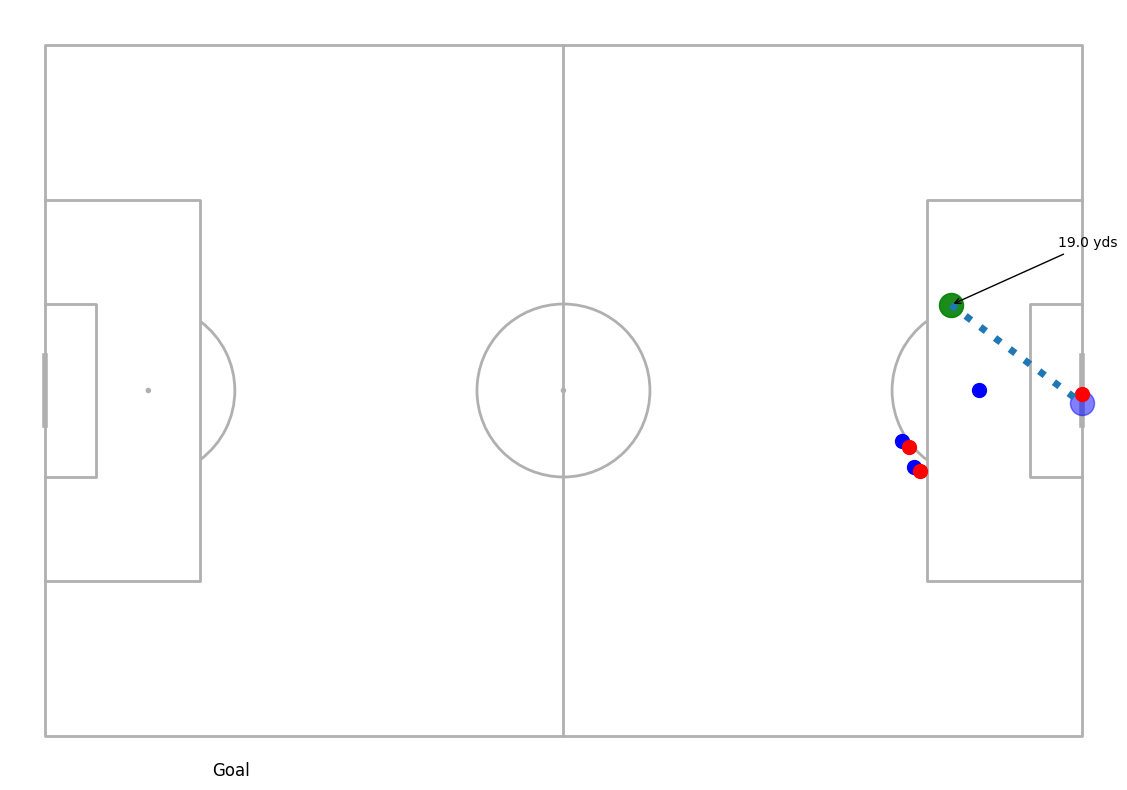

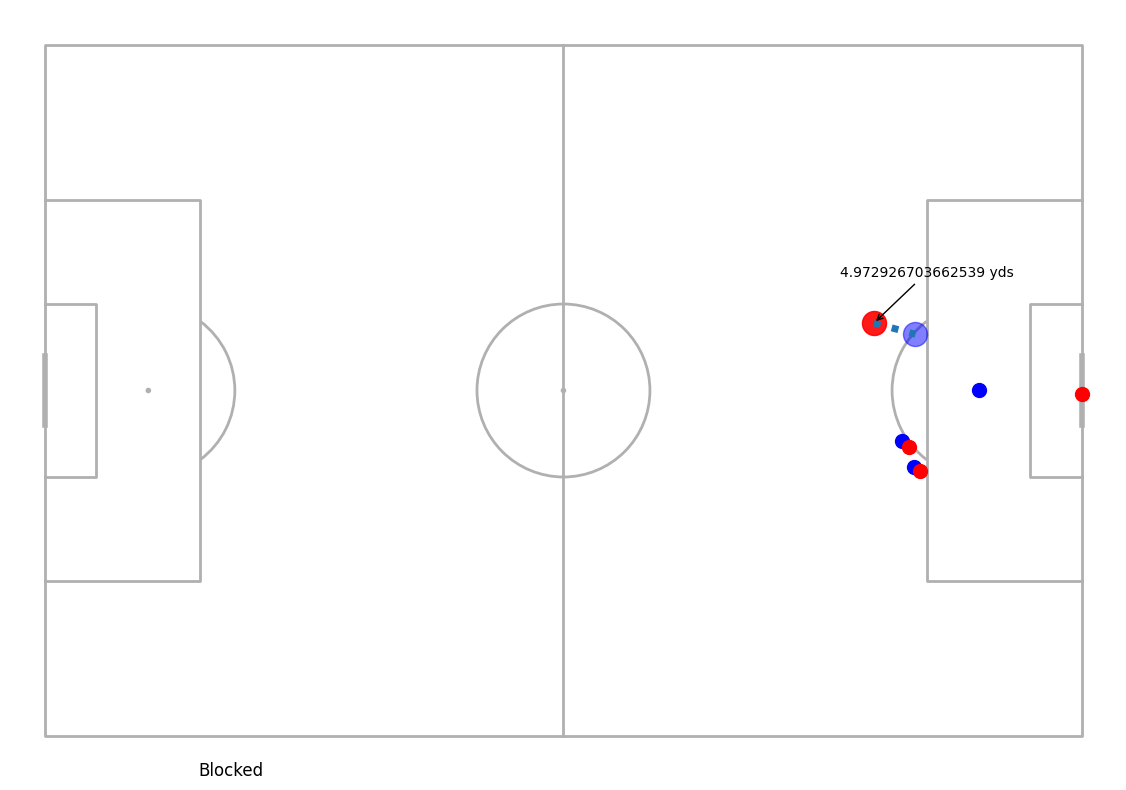

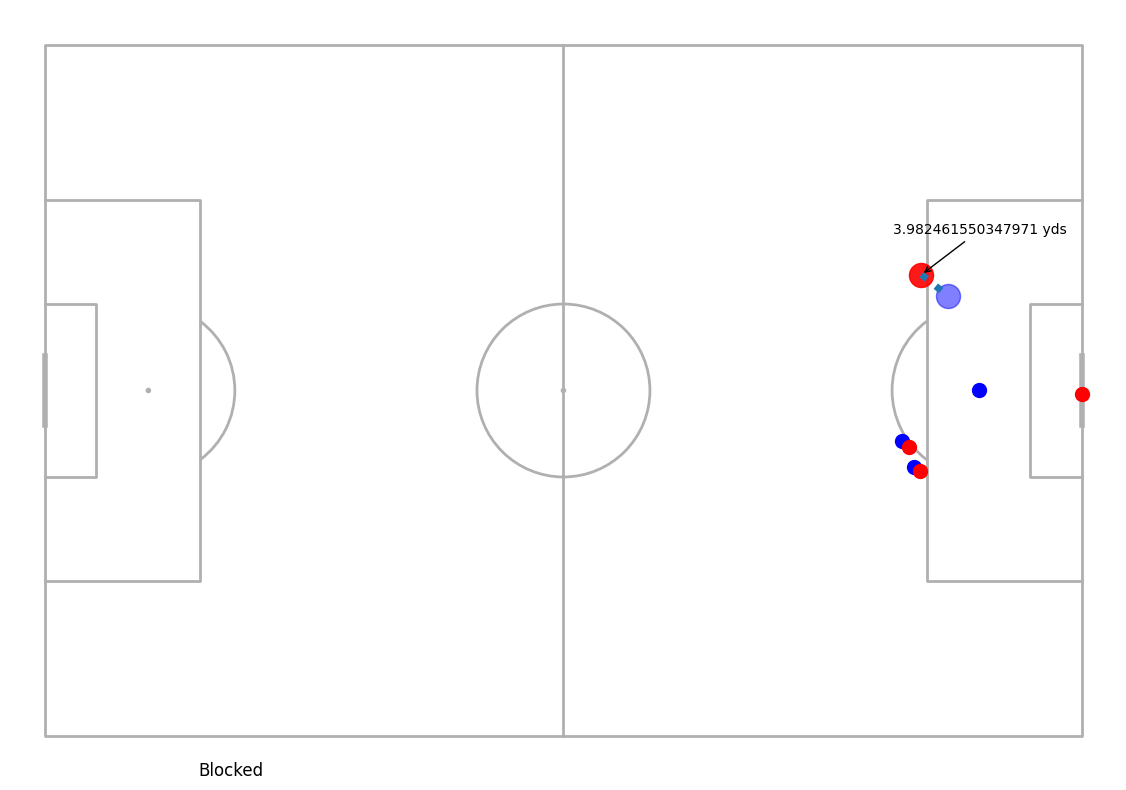

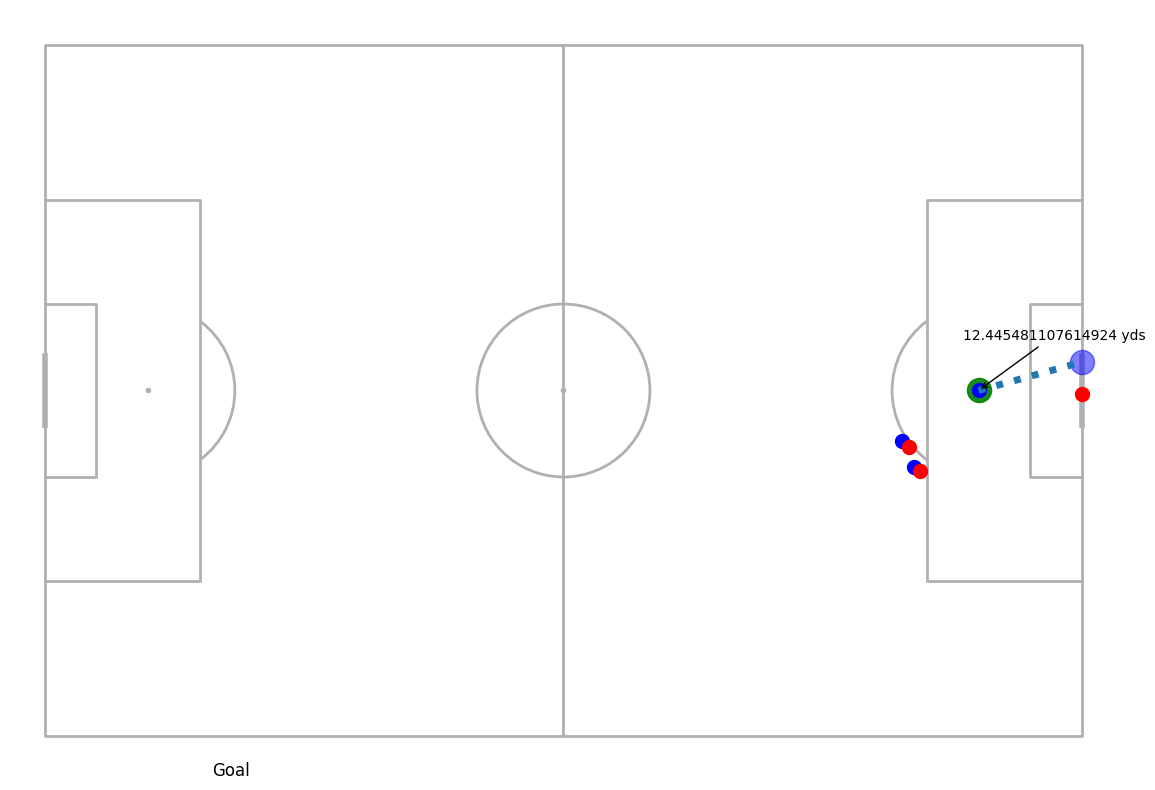

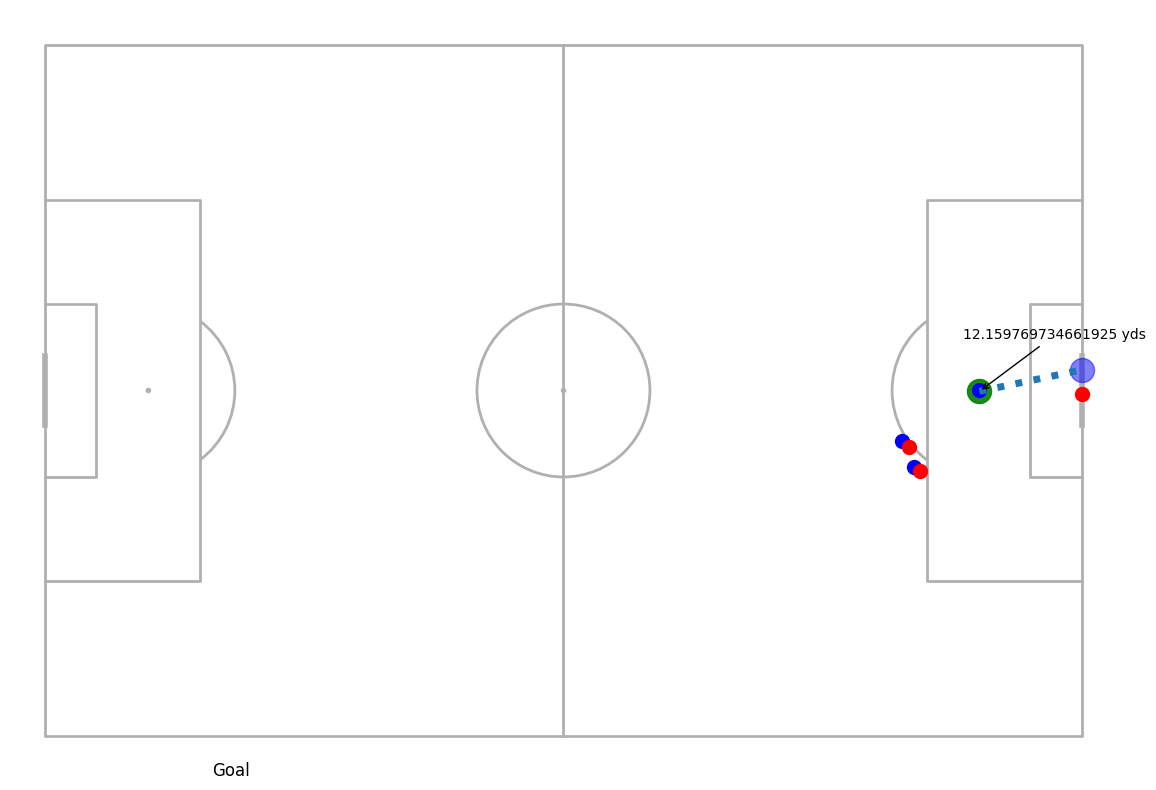

In [38]:
p = Pitch(pitch_type='statsbomb')
# Plotting the shots
for index, row in df_mbappe_shot.iterrows():
        Description = ''
        fig, ax = p.draw(figsize=(12, 8))
        if row['shot_outcome'] == 'Off T':
            p.scatter(x=row['x_start'], y=row['y_start'], ax=ax, color='black', s=300, alpha=0.5)
            Description = "Off Target"
        elif row['shot_outcome'] == 'Goal':
            p.scatter(x=row['x_start'], y=row['y_start'], ax=ax, color='green', s=300, alpha=0.9)
            Description = "Goal"
        else:
            p.scatter(x=row['x_start'], y=row['y_start'], ax=ax, color='red', s=300, alpha=0.9)
            Description = "Blocked"
        p.scatter(x=row['x_end'], y=row['y_end'], ax=ax, color='blue', s=300, alpha=0.5)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax, linestyle='dotted')
        ax.annotate(f"{row['distance']} yds", xy=(row['x_start'], row['y_start']), xytext=(row['x_end'], row['y_end']), textcoords='offset points', arrowprops=dict(arrowstyle='->'), xycoords='data', ha='right')
        ax.text(0.2, 0, Description, ha='center', va='center', transform=ax.transAxes, fontsize=12)
        for x in df1.iloc[0]['freeze_frame']:
            if x['teammate']:
                color = 'blue'
            else:
                color = 'red'

            p.scatter(x=x['location'][0],y=x['location'][1],ax=ax,c=color,s=100)
plt.show()

TypeError: 'float' object is not iterable

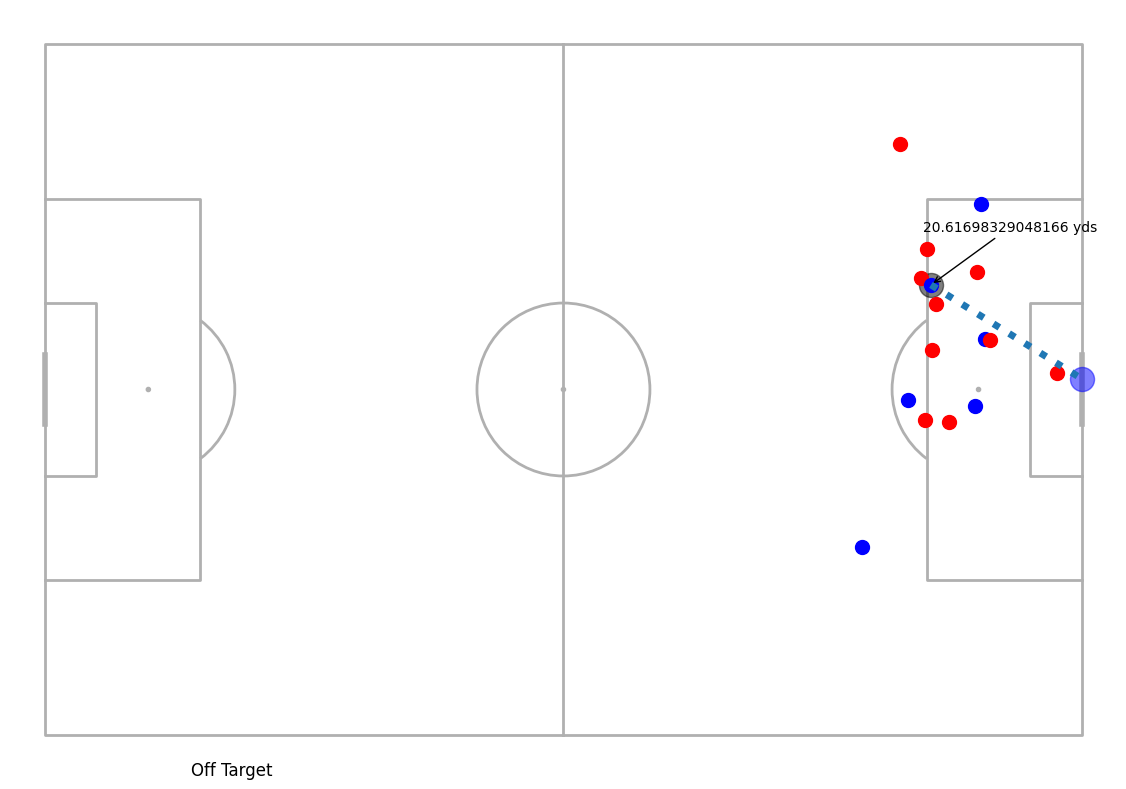

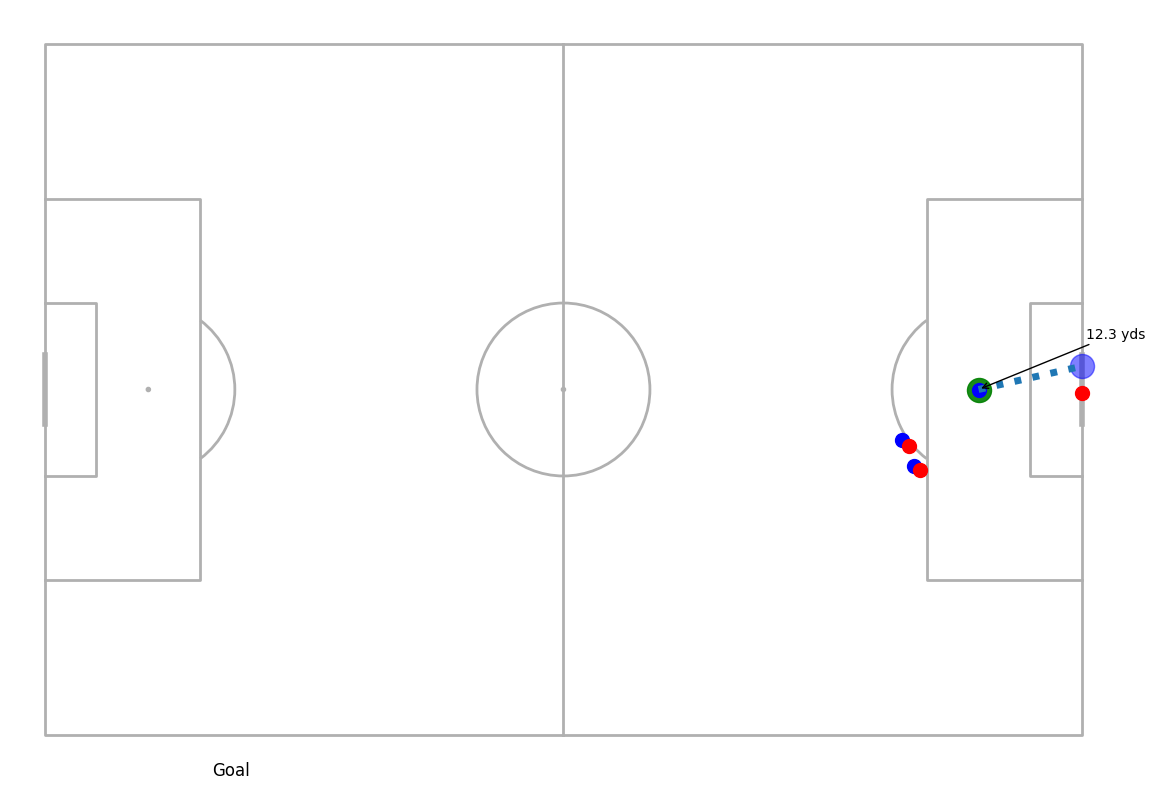

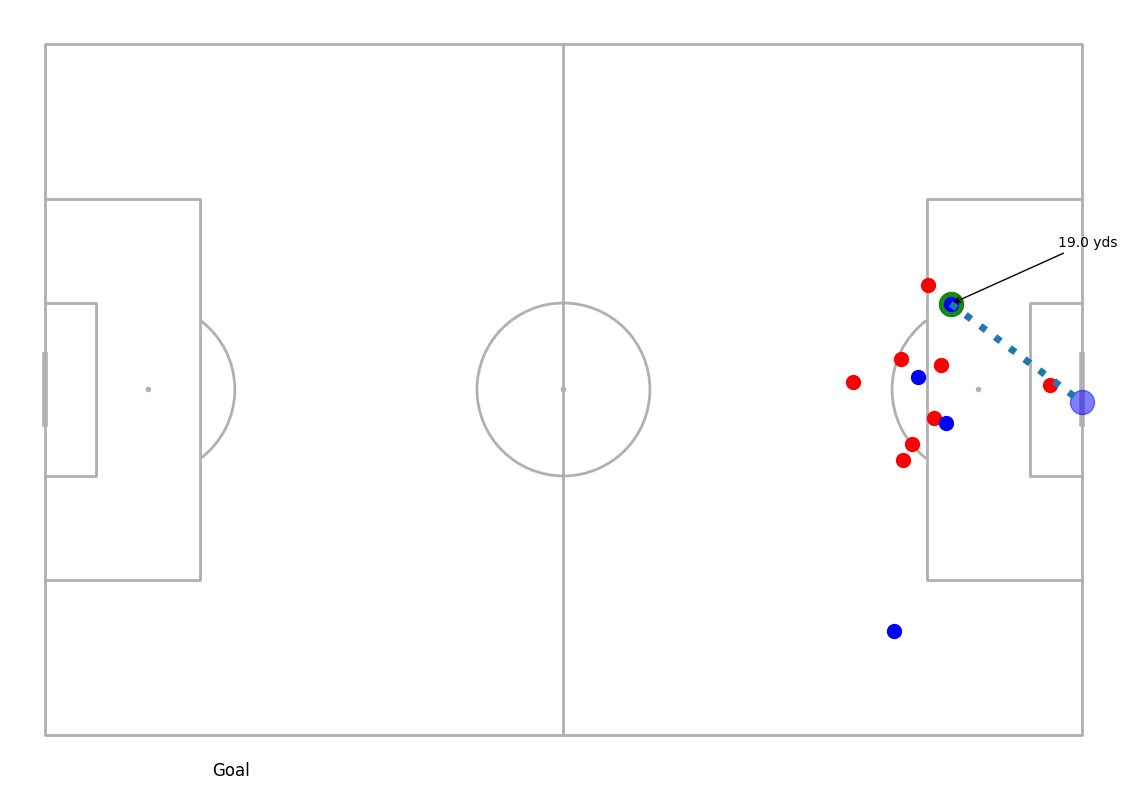

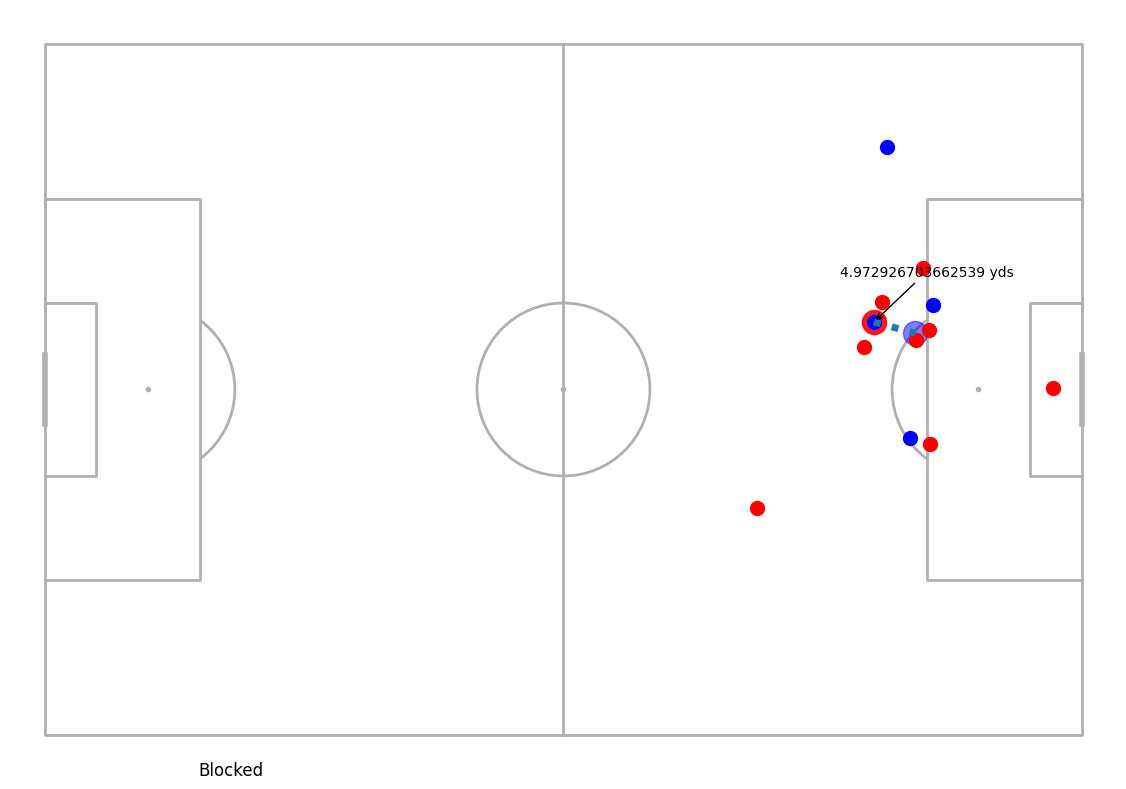

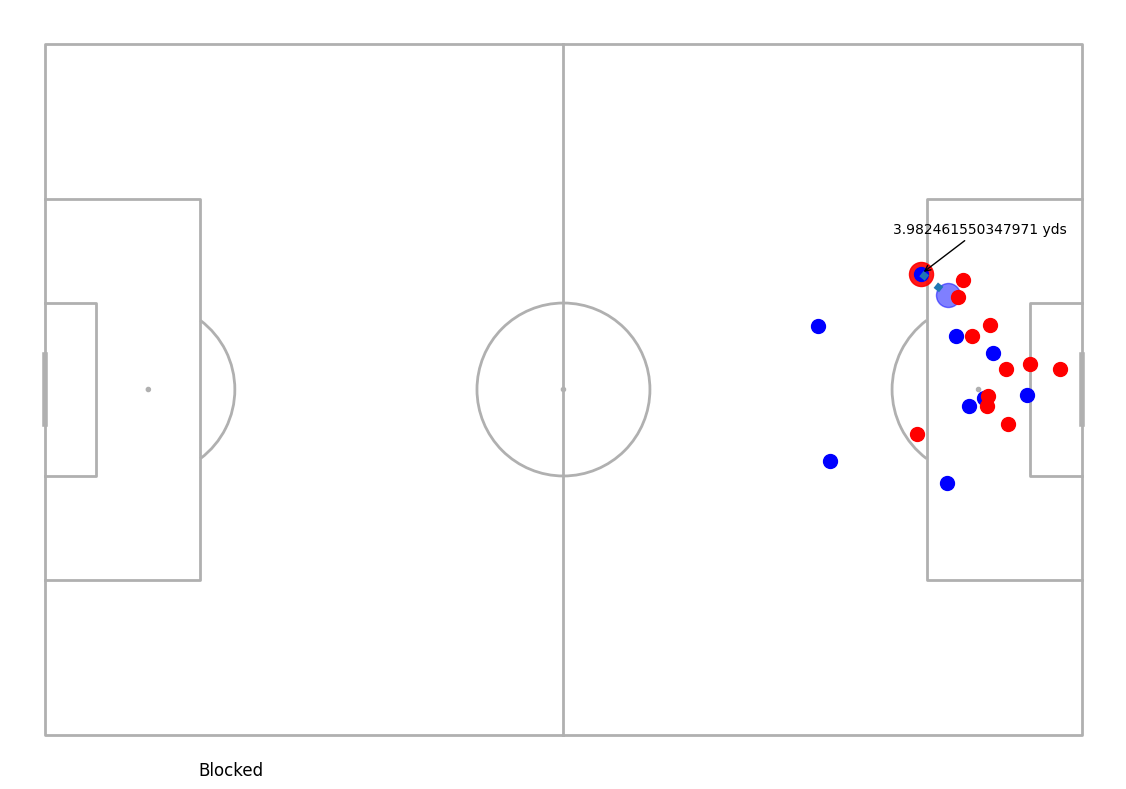

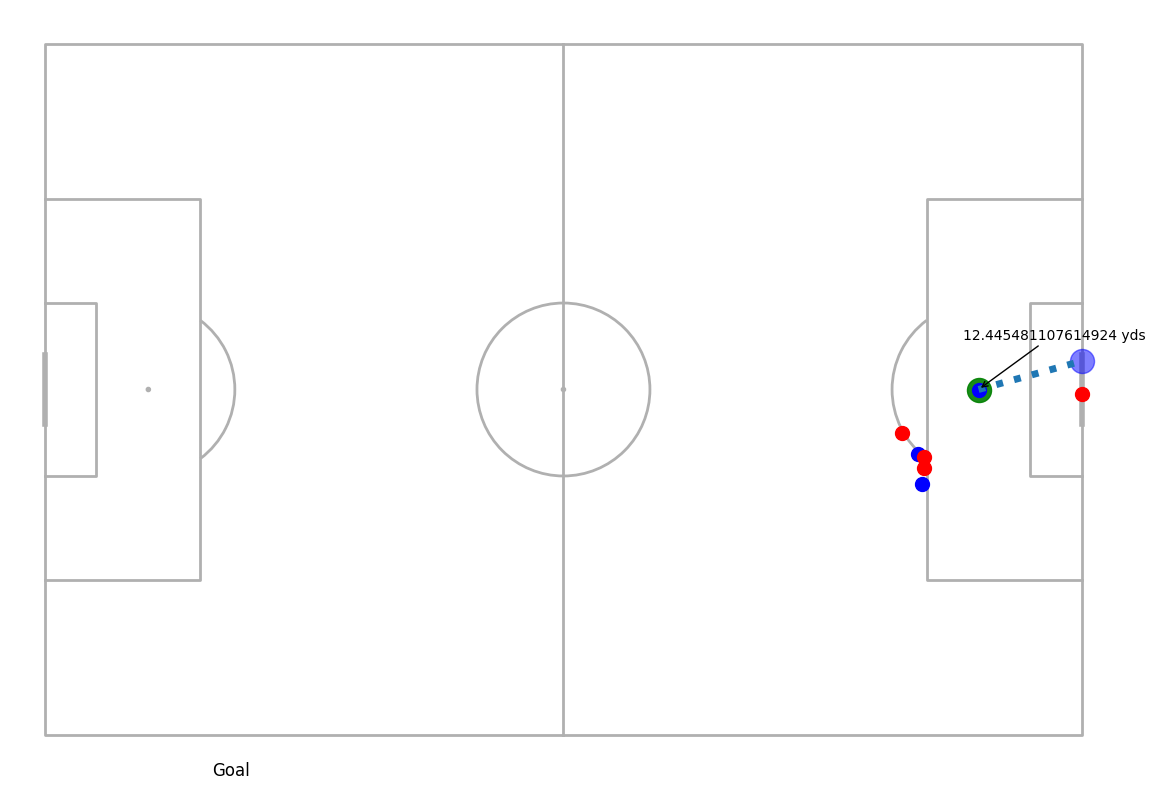

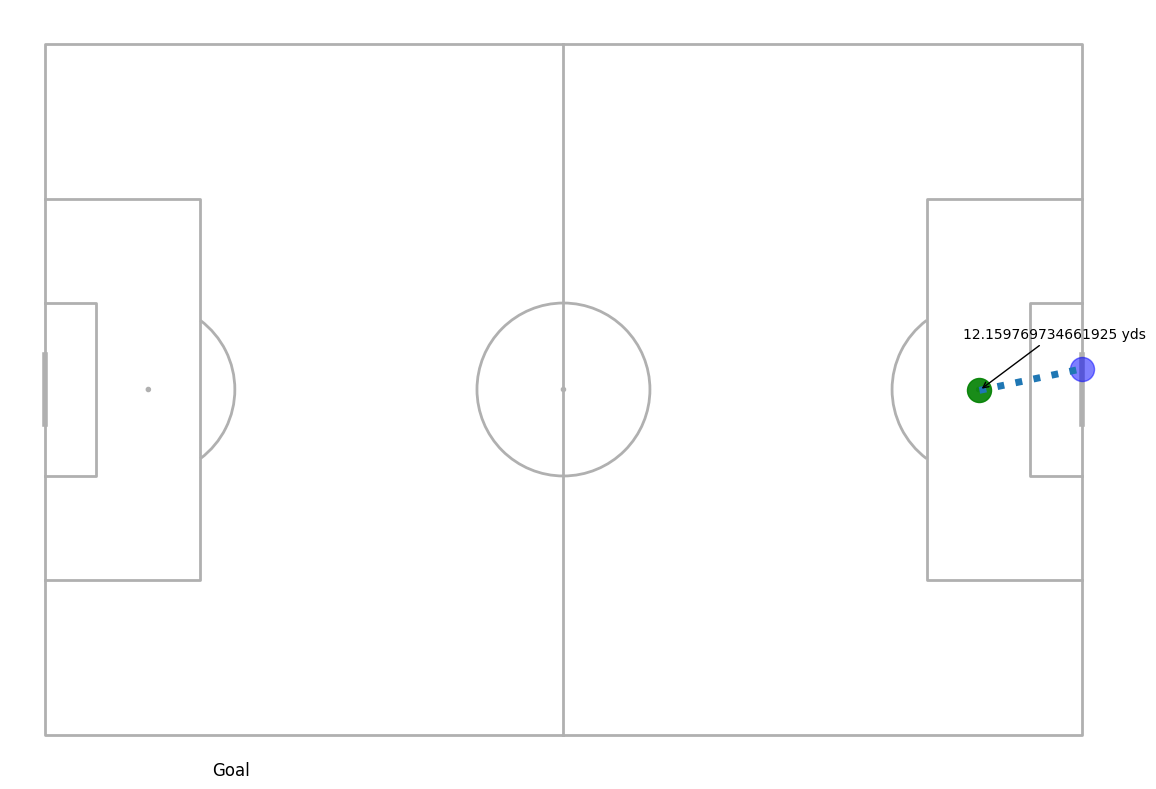

In [39]:
p = Pitch(pitch_type='statsbomb')
# Plotting the shots
for index, row in df_mbappe_shot.iterrows():
        Description = ''
        fig, ax = p.draw(figsize=(12, 8))
        if row['shot_outcome'] == 'Off T':
            p.scatter(x=row['x_start'], y=row['y_start'], ax=ax, color='black', s=300, alpha=0.5)
            Description = "Off Target"
        elif row['shot_outcome'] == 'Goal':
            p.scatter(x=row['x_start'], y=row['y_start'], ax=ax, color='green', s=300, alpha=0.9)
            Description = "Goal"
        else:
            p.scatter(x=row['x_start'], y=row['y_start'], ax=ax, color='red', s=300, alpha=0.9)
            Description = "Blocked"
        p.scatter(x=row['x_end'], y=row['y_end'], ax=ax, color='blue', s=300, alpha=0.5)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax, linestyle='dotted')
        ax.annotate(f"{row['distance']} yds", xy=(row['x_start'], row['y_start']), xytext=(row['x_end'], row['y_end']), textcoords='offset points', arrowprops=dict(arrowstyle='->'), xycoords='data', ha='right')
        ax.text(0.2, 0, Description, ha='center', va='center', transform=ax.transAxes, fontsize=12)
        for x in row['freeze_frame']:
            if not isinstance(x, float):  # Check if x is not a float
                if x['teammate']:
                    color = 'blue'
                else:
                    color = 'red'
                p.scatter(x=x['location'][0], y=x['location'][1], ax=ax, c=color, s=100)
plt.show()

### Analyzing Mbappes passes

In [40]:
## filtering the pass datapoints for Mbappe
df_mbappe_pass = df[(df['player_id']==MBAPPE) & (df['type']=='Pass')].reset_index(drop=True)

## setting the x and y start and end points for the passes
df_mbappe_pass[['x_start','y_start']] = pd.DataFrame(df_mbappe_pass.location.tolist(),index=df_mbappe_pass.index)
df_mbappe_pass[['x_end','y_end']] = pd.DataFrame(df_mbappe_pass.pass_end_location.tolist(),index=df_mbappe_pass.index)
## calculating the distances
df_mbappe_pass['distance'] = np.sqrt((df_mbappe_pass['x_end'] - df_mbappe_pass['x_start'])**2 + (df_mbappe_pass['y_end'] - df_mbappe_pass['y_start'])**2)
df_mbappe_pass.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start,x_end,y_end,distance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Pass,True,f56df973-fcb8-48e2-ae52-6d3e0506d84a,"[0.0, 80.0, 0.0, 76.6390765366849, 31.87486419...","[{'teammate': True, 'actor': False, 'keeper': ...",38.8,46.8,32.1,30.5,17.623280
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Pass,NaN,e3811e3d-4af4-4043-ae6a-2cc4af03dd23,"[37.8183594669651, 80.0, 52.8335947303895, 4.4...","[{'teammate': True, 'actor': False, 'keeper': ...",68.7,5.9,56.1,10.2,13.313527
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Pass,NaN,a58e0380-cad1-4d26-92b6-aed516eedbfa,"[96.0595054922246, 80.0, 76.7150454240708, 14....","[{'teammate': True, 'actor': False, 'keeper': ...",99.1,19.2,99.5,28.2,9.008885
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Pass,True,309fe67b-f8fe-4b73-8ee5-5870a4eac34d,"[57.9102241639588, 80.0, 60.9769965072948, 3.6...","[{'teammate': True, 'actor': False, 'keeper': ...",81.8,5.1,68.9,7.7,13.159407
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Pass,NaN,bf211d84-bf4c-438a-98db-41960ae7157f,"[71.0833201447995, 80.0, 66.1066724404542, 5.5...","[{'teammate': True, 'actor': False, 'keeper': ...",86.7,14.1,103.6,7.9,18.001389


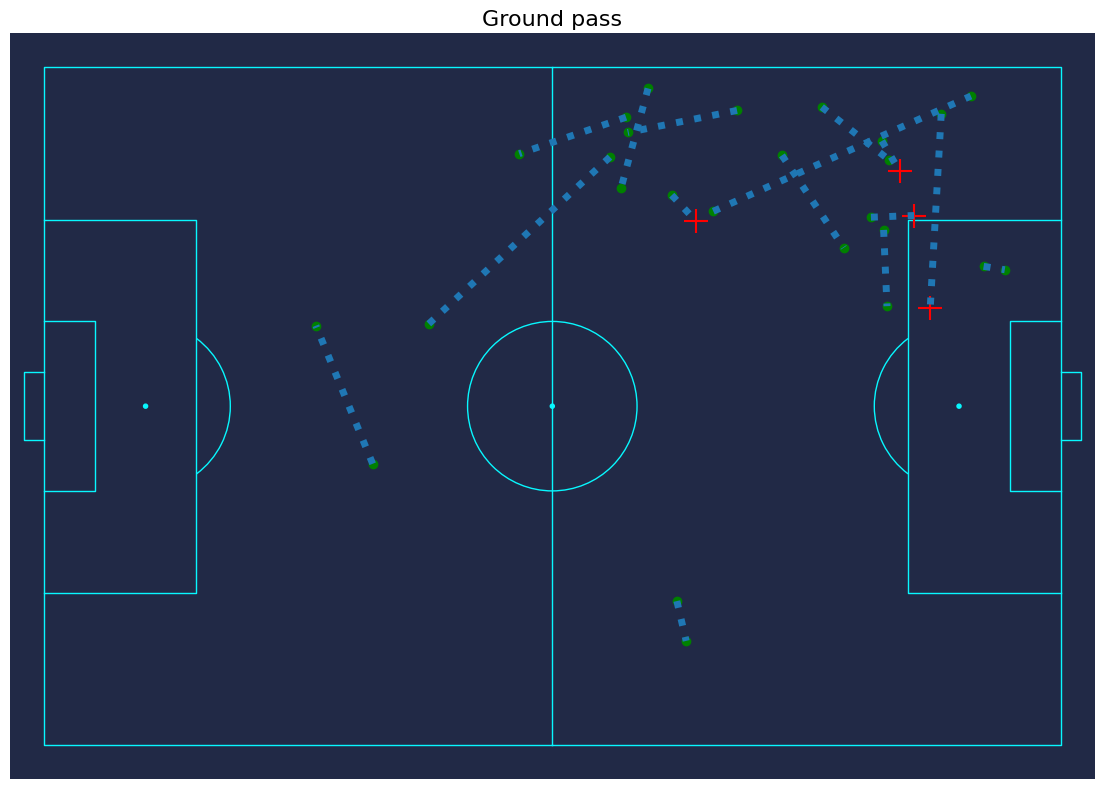

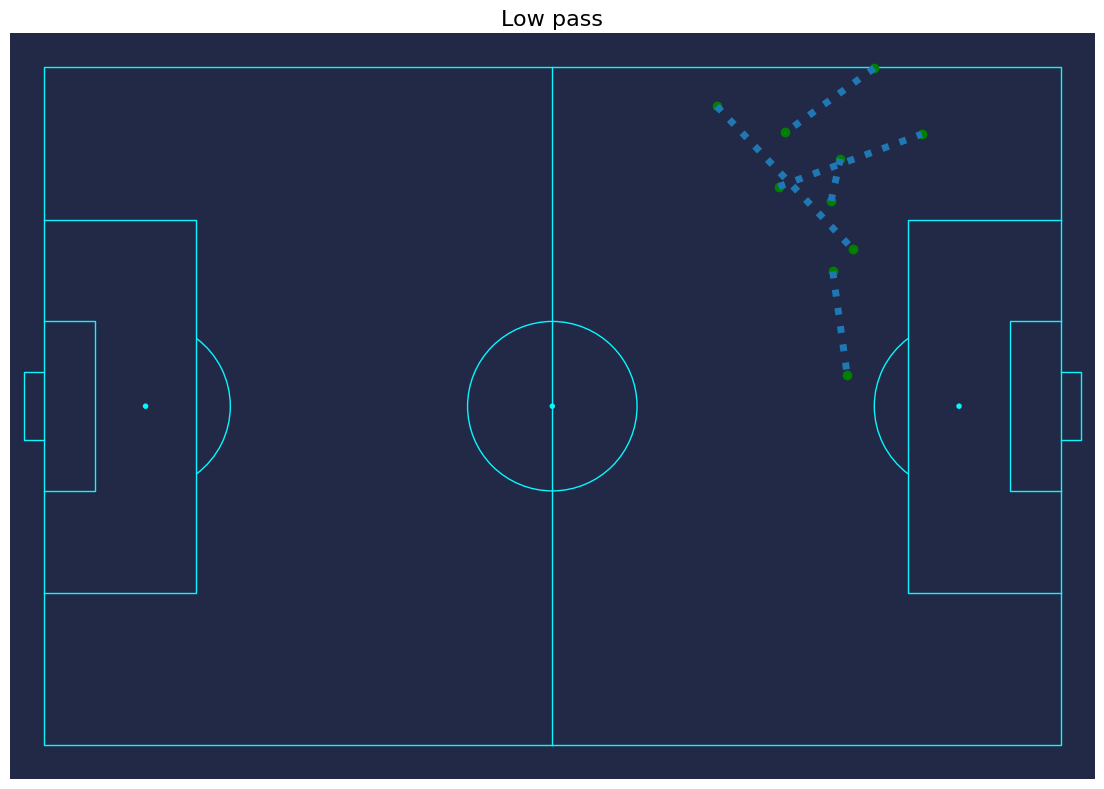

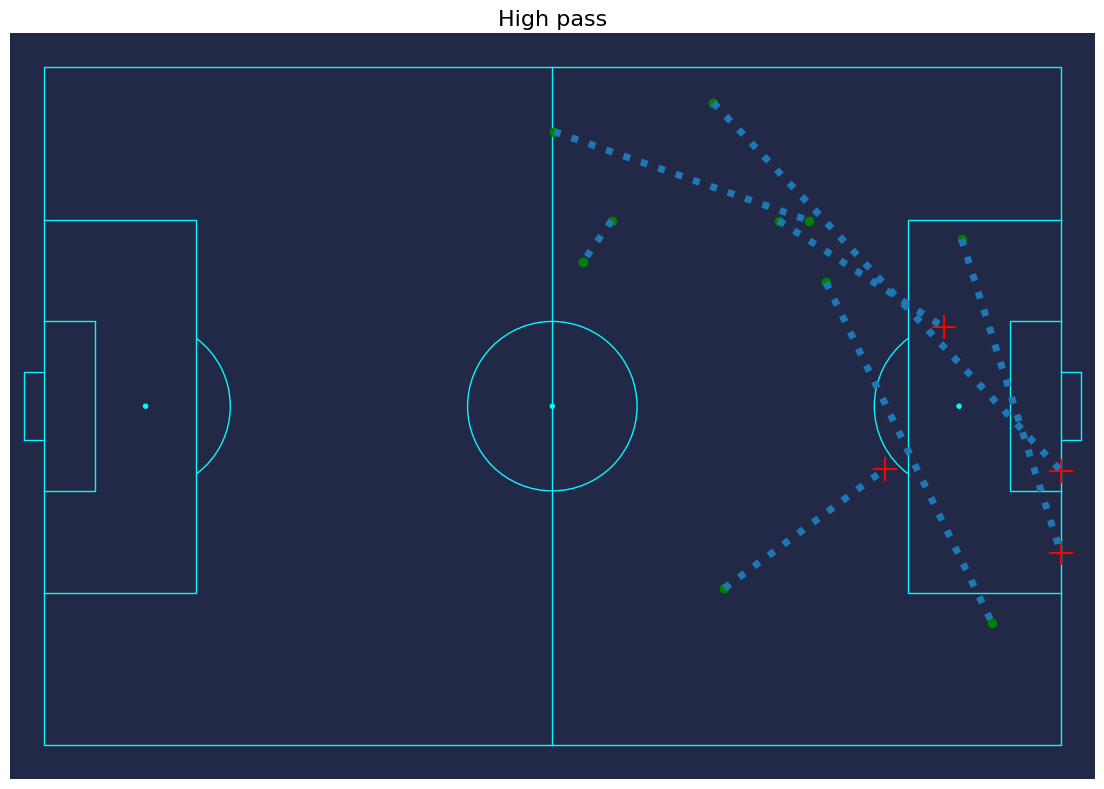

In [53]:
## filtering the dataframe according to the passes which are of three types

df_ground_pass = df_mbappe_pass[df_mbappe_pass['pass_height']=="Ground Pass"]
df_low_pass = df_mbappe_pass[df_mbappe_pass['pass_height']=="Low Pass"]
df_high_pass = df_mbappe_pass[df_mbappe_pass['pass_height']=="High Pass"]

LINEWIDTH = 1  # starting linewidth
DIFF_LINEWIDTH = 1.2  # amount the glow linewidth increases each loop
NUM_GLOW_LINES = 10  # the amount of loops, if you increase the glow will be wider

# in each loop, for the glow, we plot the alpha divided by the num_glow_lines
# I have a lower alpha_pass_line value as there is a slight overlap in
# the pass comet lines when using capstyle='round'
ALPHA_PITCH_LINE = 0.3
ALPHA_PASS_LINE = 0.15

# The colors are borrowed from mplcyberpunk. Try some of the following alternatives
# '#08F7FE' (teal/cyan), '#FE53BB' (pink), '#F5D300' (yellow),
# '#00ff41' (matrix green), 'r' (red), '#9467bd' (viloet)
BACKGROUND_COLOR = '#212946'
PASS_COLOR = '#FE53BB'
LINE_COLOR = '#08F7FE'
p = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR, linewidth=LINEWIDTH,
              line_alpha=1, goal_alpha=1, goal_type='box')

## plot for ground pass
fig, ax = p.draw(figsize=(12, 8))
ax.set_title("Ground pass", fontsize=16)
for index, row in df_ground_pass.iterrows():
    if row['pass_outcome'] in ['Incomplete', 'Out']:       
        p.scatter(x=row['x_start'], y=row['y_start'], color='green',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'],s=300, color='red',ax=ax,marker='+')
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], color='green',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'], color='green',ax=ax)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted')

fig, ax = p.draw(figsize=(12, 8))
ax.set_title("Low pass", fontsize=16)
for index, row in df_low_pass.iterrows():
    if row['pass_outcome'] in ['Incomplete', 'Out']:       
        p.scatter(x=row['x_start'], y=row['y_start'], color='green',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'],s=300, color='red',ax=ax,marker='+')
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], color='green',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'], color='green',ax=ax)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 

fig, ax = p.draw(figsize=(12, 8))
ax.set_title("High pass", fontsize=16)
for index, row in df_high_pass.iterrows():
    if row['pass_outcome'] in ['Incomplete', 'Out']:      
        p.scatter(x=row['x_start'], y=row['y_start'], color='green',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'],s=300, color='red',ax=ax,marker='+')
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], color='green',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'], color='green',ax=ax)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 


In [ ]:
df_ground_pass